<a href="https://colab.research.google.com/github/sesitsop/MoRLiCS_TDA/blob/master/TDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px">

<h1>Welcome to Colaboratory!</h1>

Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

# New Section

In [0]:
#@title Introducing Colaboratory
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the ▷ button to the left of the code, or use the keyboard shortcut "⌘/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

# Traffic Data Analysis


In [110]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 50220319.tcd.csv to 50220319.tcd.csv
User uploaded file "50220319.tcd.csv" with length 1886819 bytes


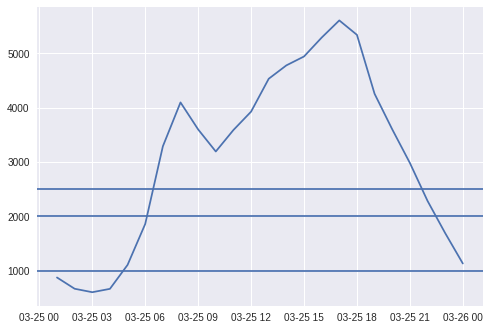

In [111]:
#load csv into dataframe, Set DateTimeIndex on Date, Time
import pandas as pd
import numpy as np
import io
import datetime

TCD = pd.read_csv(io.BytesIO(uploaded['50220319.tcd.csv']))

# convert 'Time' column from string to datetime
TCD['Time'] = pd.to_datetime(TCD['Time'])

#TCD0319 = TCD0319.set_index(pd.DatetimeIndex(TCD0319['Time']))

#TCD0319.resample('3T', label='right').sum()

TCDf = TCD[['Geographic Address','Time','Flow(Lane 1)','Flow(Lane 2)','Flow(Lane 3)','Flow(Lane 4)']]

#### either one here, hash out the not applicable one
#TCDf = TCDf.set_index([pd.DatetimeIndex(TCDf['Time']),'Geographic Address'])
TCDf = TCDf.set_index([pd.DatetimeIndex(TCDf['Time'])])
####
#TCDf.groupby(level=1).sum()

TCDf['FlowT'] = TCDf['Flow(Lane 1)'] + TCDf['Flow(Lane 2)'] + TCDf['Flow(Lane 3)'] + TCDf['Flow(Lane 4)']

TCDf['FlowT'] = TCDf['FlowT'].div(8) 

TCDfT = TCDf[['Geographic Address', 'Time', 'FlowT']]

TCDfT = TCDfT.resample('60T', label='right').sum()

#TCDf

####
#split the dataframe into xyz array only
#xyz = np.split(slog, [3], axis=1)

#xyz[0]

#put xyz back into a dataframe
#df_xyz = pd.DataFrame(xyz[0])

####
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

fT = TCDfT['FlowT']

plt.plot(fT)
plt.axhline(y=1000, xmin=0, xmax=1440)
plt.axhline(y=2000, xmin=0, xmax=1440)
plt.axhline(y=2500, xmin=0, xmax=1440)